# Rising Insights

In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# convert scientific notation to decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Load Data

In [10]:
df = pd.read_csv('data/flightsmerged.csv', low_memory=False)
print(df.columns)
df.head()

Index(['MONTH', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AC', 'DESTINATION_AC',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED',
       'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'DATE', 'AIRLINE_CODE', 'AIRLINE_NAME',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'],
      dtype='object')


,MONTH,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AC,DESTINATION_AC,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,...,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE,AIRLINE_CODE,AIRLINE_NAME,ORIGIN_AIRPORT,DESTINATION_AIRPORT
0,1,98,N407AS,ANC,SEA,00:05:00,23:54:00,-11.00,205.00,194.00,...,nan,nan,nan,nan,nan,2015-01-01,AS,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Seattle-Tacoma International Airport
1,1,2336,N3KUAA,LAX,PBI,00:10:00,00:02:00,-8.00,280.00,279.00,...,nan,nan,nan,nan,nan,2015-01-01,AA,American Airlines Inc.,Los Angeles International Airport,Palm Beach International Airport
2,1,840,N171US,SFO,CLT,00:20:00,00:18:00,-2.00,286.00,293.00,...,nan,nan,nan,nan,nan,2015-01-01,US,US Airways Inc.,San Francisco International Airport,Charlotte Douglas International Airport
3,1,258,N3HYAA,LAX,MIA,00:20:00,00:15:00,-5.00,285.00,281.00,...,nan,nan,nan,nan,nan,2015-01-01,AA,American Airlines Inc.,Los Angeles International Airport,Miami International Airport
4,1,135,N527AS,SEA,ANC,00:25:00,00:24:00,-1.00,235.00,215.00,...,nan,nan,nan,nan,nan,2015-01-01,AS,Alaska Airlines Inc.,Seattle-Tacoma International Airport,Ted Stevens Anchorage International Airport


## Months x Delays

### From Exploratory phase, June has the highest arrival delay. WHY?

In [19]:
june_wd = df[df['MONTH'] == 6]['WEATHER_DELAY'].mean()
june_ad = df[df['MONTH'] == 6]['AIRLINE_DELAY'].mean()
june_asd = df[df['MONTH'] == 6]['AIR_SYSTEM_DELAY'].mean()
june_sd = df[df['MONTH'] == 6]['SECURITY_DELAY'].mean()
june_lad = df[df['MONTH'] == 6]['LATE_AIRCRAFT_DELAY'].mean()

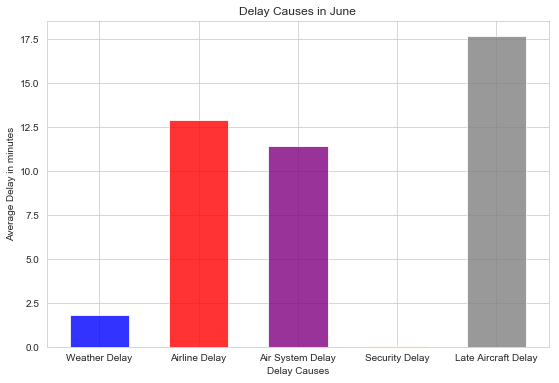

Mean Weather Delay =  1.7869037510613854
Mean Airline Delay =  12.892462913940363
Mean Air System Delay =  11.4077318815244
Mean Security Delay =  0.05864841915988212
Mean Late Aircraft Delay =  17.64226562109785


In [24]:
plt.figure(figsize=(9,6))

plt.bar(x = ['Weather Delay','Airline Delay','Air System Delay','Security Delay','Late Aircraft Delay'],
        height=[june_wd, june_ad, june_asd, june_sd, june_lad],
       alpha=0.8, color=['b','r','purple','orange','gray'], width=0.6)

plt.title('Delay Causes in June')
plt.xlabel('Delay Causes')
plt.ylabel('Average Delay in minutes')

plt.savefig('Charts/june_delay_reasons.png', dpi=100)
plt.show()


print("Mean Weather Delay = ", june_wd)
print("Mean Airline Delay = ",june_ad)
print("Mean Air System Delay = ", june_asd)
print("Mean Security Delay = ",june_sd)
print("Mean Late Aircraft Delay = ",june_lad)

#### Late Aircraft Delay and Airline Delay is the main reason of flight delays in june.

In [ ]:
feb_cancellation = df[df['MONTH'] == 2]['CANCELLATION_REASON']

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('# Flight Cancelled')
plt.xlabel('Cancellation Reasons')
plt.ylabel('# Flights')

plt.bar(feb_cancellation.index, feb_cancellation.values, align='center', alpha=0.5, color=['red','purple','navy','gray'])

plt.savefig('Charts/cancellation_causes.png', dpi=100)
plt.show()

## Airlines x Delays

### United Airlines has the highest arrival and Departure delay. WHY?

In [14]:
united_wd = df[df['AIRLINE_CODE'] == 'UA']['WEATHER_DELAY'].mean()
united_ad = df[df['AIRLINE_CODE'] == 'UA']['AIRLINE_DELAY'].mean()
united_asd = df[df['AIRLINE_CODE'] == 'UA']['AIR_SYSTEM_DELAY'].mean()
united_sd = df[df['AIRLINE_CODE'] == 'UA']['SECURITY_DELAY'].mean()
united_lad = df[df['AIRLINE_CODE'] == 'UA']['LATE_AIRCRAFT_DELAY'].mean()

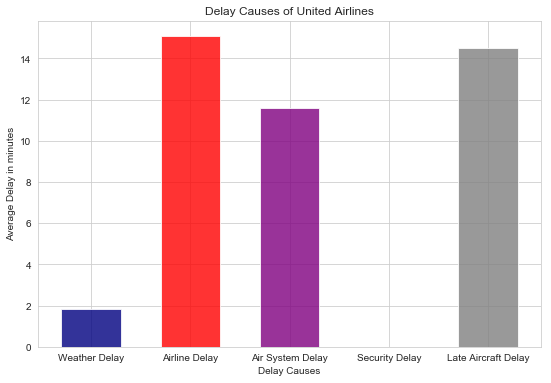

Mean Weather Delay =  1.8399717339853958
Mean Airline Delay =  15.0789092907698
Mean Air System Delay =  11.5980841923435
Mean Security Delay =  0.01326932352248382
Mean Late Aircraft Delay =  14.513667515394882


In [22]:
plt.figure(figsize=(9, 6))

plt.bar(x = ['Weather Delay','Airline Delay','Air System Delay','Security Delay','Late Aircraft Delay'],
        height=[united_wd, united_ad, united_asd, united_sd, united_lad],
       alpha=0.8, width=0.6, color=['navy','r','purple','orange','gray'])

plt.title('Delay Causes of United Airlines')
plt.xlabel('Delay Causes')
plt.ylabel('Average Delay in minutes')

plt.savefig('Charts/united_delay_reasons.png', dpi=100)
plt.show()

print("Mean Weather Delay = ", united_wd)
print("Mean Airline Delay = ",united_ad)
print("Mean Air System Delay = ", united_asd)
print("Mean Security Delay = ",united_sd)
print("Mean Late Aircraft Delay = ",united_lad)